# SEGGER division

https://blog.segger.com/algorithms-for-division-part-3-using-multiplication/

In [24]:

rd = (
    0xFFFF, 0xFE03, 0xFC0F, 0xFA23, 0xF83E, 0xF660, 0xF489, 0xF2B9,
    0xF0F0, 0xEF2E, 0xED73, 0xEBBD, 0xEA0E, 0xE865, 0xE6C2, 0xE525,
    0xE38E, 0xE1FC, 0xE070, 0xDEE9, 0xDD67, 0xDBEB, 0xDA74, 0xD901,
    0xD794, 0xD62B, 0xD4C7, 0xD368, 0xD20D, 0xD0B6, 0xCF64, 0xCE16,
    0xCCCC, 0xCB87, 0xCA45, 0xC907, 0xC7CE, 0xC698, 0xC565, 0xC437,
    0xC30C, 0xC1E4, 0xC0C0, 0xBFA0, 0xBE82, 0xBD69, 0xBC52, 0xBB3E,
    0xBA2E, 0xB921, 0xB817, 0xB70F, 0xB60B, 0xB509, 0xB40B, 0xB30F,
    0xB216, 0xB11F, 0xB02C, 0xAF3A, 0xAE4C, 0xAD60, 0xAC76, 0xAB8F,
    0xAAAA, 0xA9C8, 0xA8E8, 0xA80A, 0xA72F, 0xA655, 0xA57E, 0xA4A9,
    0xA3D7, 0xA306, 0xA237, 0xA16B, 0xA0A0, 0x9FD8, 0x9F11, 0x9E4C,
    0x9D89, 0x9CC8, 0x9C09, 0x9B4C, 0x9A90, 0x99D7, 0x991F, 0x9868,
    0x97B4, 0x9701, 0x964F, 0x95A0, 0x94F2, 0x9445, 0x939A, 0x92F1,
    0x9249, 0x91A2, 0x90FD, 0x905A, 0x8FB8, 0x8F17, 0x8E78, 0x8DDA,
    0x8D3D, 0x8CA2, 0x8C08, 0x8B70, 0x8AD8, 0x8A42, 0x89AE, 0x891A,
    0x8888, 0x87F7, 0x8767, 0x86D9, 0x864B, 0x85BF, 0x8534, 0x84A9,
    0x8421, 0x8399, 0x8312, 0x828C, 0x8208, 0x8184, 0x8102, 0x8080
    )

def divv(u, v):
    n=f'{v:016b}'.index('1') # clz(v)
    r=rd[((v<<n)>>8)-0x80]
    qx=u*r
    q=qx>>16
    q=q>>(15-n)
    return q # speed is more critical
    if(q>0):q-=1
    u-=q*v
    if(u>v):
        q+=1
        u-=v
        if(u>=v):
            q+=1
    return q


limits: 1.0 - 65535.0


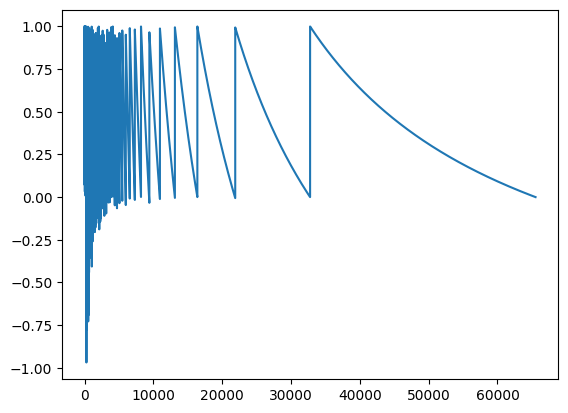

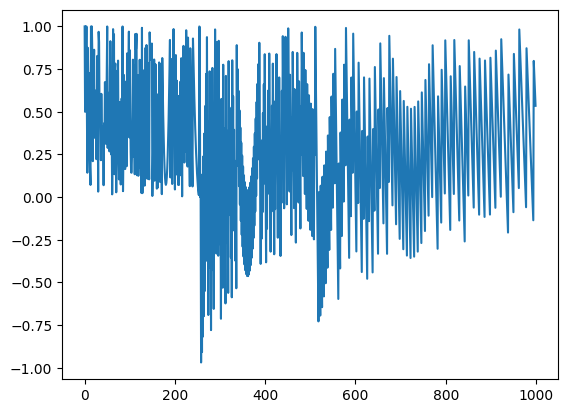

In [28]:
import numpy as np
import matplotlib.pyplot as plt


a = np.arange(1,65536)
b = np.array(a)
for i in range(len(a)):
    b[i] = divv(65535, a[i])

c = 65535/a
d = c - b

print(f'limits: {min(c)} - {max(c)}')
plt.plot(d)
plt.show()
plt.plot(d[:1000])
plt.show()
